<img src="https://cybersecurity-excellence-awards.com/wp-content/uploads/2017/06/366812.png">

<h1><center>Darwin Supervised Classification Model Building </center></h1>

Prior to getting started, there are a few things you want to do:
1. Set the dataset path.
2. Enter your username and password to ensure that you're able to log in successfully

Once you're up and running, here are a few things to be mindful of:
1. For every run, look up the job status (i.e. requested, failed, running, completed) and wait for job to complete before proceeding. 
2. If you're not satisfied with your model and think that Darwin can do better by exploring a larger search space, use the resume function.

## Import libraries

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report

from amb_sdk.sdk import DarwinSdk

## Setup

**Login to Darwin**<br>
Enter your registered username and password below to login to Darwin.

In [2]:
# Login
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('yasser@utexas.edu', 'En5dC4ZGwL')

if not status:
    print(msg)

**Data Path** <br>
In the cell below, set the path to your dataset, the default is Darwin's example datasets

In [3]:
path = 'listings/'

## Data Upload and Clean

**Read dataset and view a file snippet**

After setting up the dataset path, the next step is to upload the dataset from your local device to the server. <br> In the cell below, you need to specify the dataset_name if you want to use your own data.

In [23]:
pre_df = pd.read_csv('listings/austin_listings.csv')

pre_df['price'].dtype

dtype('int64')

In [4]:
dataset_name = 'austin_listings.csv'

df = pd.read_csv(os.path.join(path, dataset_name))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1078,*UT/Hyde Park Craftsman Apartment,4635658,Tracy,NaN,78705,30.30123,-97.73674,Entire home/apt,85,1,208,2017-07-14,1.63,3,43
1,2265,Zen-East in the Heart of Austin,2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,225,2,23,2018-09-16,0.19,3,125
2,5245,"Green, Colorful, Clean & Cozy home",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,100,28,9,2018-03-14,0.07,3,3
3,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,95,2,472,2019-02-22,3.88,1,302
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45596,-97.78370,Private room,40,1,240,2019-02-24,2.21,1,72


**Upload dataset to Darwin**

In [ ]:
# Upload dataset
status, message = ds.delete_dataset(dataset_name)
status, dataset = ds.upload_dataset(os.path.join(path, dataset_name))
if not status:
    print(dataset)

**Clean dataset**

In [15]:
# clean dataset
import urllib
target = "price"
status, job_id = ds.clean_data(dataset_name, target = target)



if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print('eh')
    #print(job_id)AttributeError: 'module' object has no attribute 'parse'

{'status': 'Requested', 'starttime': '2019-04-17T16:03:04.71375', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['austin_listings.csv'], 'artifact_names': ['b6dcbc76e10f449ebba21bed43767712'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-17T16:03:04.71375', 'endtime': '2019-04-17T16:03:07.700076', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['austin_listings.csv'], 'artifact_names': ['b6dcbc76e10f449ebba21bed43767712'], 'model_name': None, 'job_error': ''}


## Create and Train Model 

We will now build a model that will learn the class labels in the target column.<br> In the default cancer dataset, the target column is "Diagnosis". <br> You will have to specify your own target name for your custom dataset. <br> You can also increase max_train_time for longer training.


In [17]:
model = target + "_model1"
status, job_id = ds.create_model(dataset_names = dataset_name, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

400: BAD REQUEST - {"message": "A model with this name already exists"}



## Extra Training (Optional)
Run the following cell for extra training, no need to specify parameters

In [9]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = dataset_name,
                                          model_name = model,
                                          max_train_time = '00:05')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-17T14:54:10.13085', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.36350110173225403, 'generations': 9, 'dataset_names': ['austin_listings.csv'], 'artifact_names': None, 'model_name': 'price_model0', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-17T14:54:10.13085', 'endtime': None, 'percent_complete': 1, 'job_type': 'UpdateModel', 'loss': 0.36350110173225403, 'generations': 12, 'dataset_names': ['austin_listings.csv'], 'artifact_names': None, 'model_name': 'price_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T14:54:10.13085', 'endtime': None, 'percent_complete': 1, 'job_type': 'UpdateModel', 'loss': 0.36350110173225403, 'generations': 12, 'dataset_names': ['austin_listings.csv'], 'artifact_names': None, 'model_name': 'price_model0', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-17T14:54:10.13085', 'endtime': None, 'percent_complete': 1, 'job_type': 'Upda

## Analyze Model
Analyze model provides feature importance ranked by the model. <br> It indicates a general view of which features pose a bigger impact on the model

In [10]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-17T14:58:42.239407', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.36350110173225403, 'generations': 12, 'dataset_names': None, 'artifact_names': ['406522f02b184d4b861b189502e08cb1'], 'model_name': 'price_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-17T14:58:42.239407', 'endtime': '2019-04-17T14:58:44.978028', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.36350110173225403, 'generations': 12, 'dataset_names': None, 'artifact_names': ['406522f02b184d4b861b189502e08cb1'], 'model_name': 'price_model0', 'job_error': ''}


Show the 10 most important features of the model.

In [11]:
feature_importance[:10]

calculated_host_listings_count    0.431390
number_of_reviews                 0.122843
id                                0.102306
minimum_nights                    0.063941
availability_365                  0.063261
longitude                         0.058672
latitude                          0.045806
host_id                           0.032193
room_type = Private room          0.028967
reviews_per_month                 0.028261
dtype: float64

## Predictions
**Perform model prediction on the the training dataset.**

In [12]:
status, artifact = ds.run_model(dataset_name, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-17T15:08:47.737053', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.36350110173225403, 'generations': 12, 'dataset_names': ['austin_listings.csv'], 'artifact_names': ['cb6d3f16d6634b32a46482bada5d526f'], 'model_name': 'price_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-17T15:08:47.737053', 'endtime': '2019-04-17T15:08:49.534537', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.36350110173225403, 'generations': 12, 'dataset_names': ['austin_listings.csv'], 'artifact_names': ['cb6d3f16d6634b32a46482bada5d526f'], 'model_name': 'price_model0', 'job_error': ''}


(True, 'Job completed')

Download predictions from Darwin's server.

In [13]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,price
0,97.972565
1,240.677765
2,88.221405
3,143.038361
4,54.740604


Create plots comparing predictions with actual target

ValueError: Mix type of y not allowed, got types {'continuous', 'multiclass'}

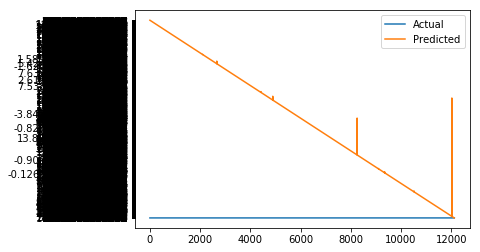

In [20]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

**Perform model prediction on a test dataset that wasn't used in training.** <br>
Upload test dataset

In [ ]:
test_data = 'austin_listings.csv'
status, dataset = ds.upload_dataset(os.path.join(path, test_data))
if not status:
    print(dataset)

clean test data

In [ ]:
# clean test dataset
status, job_id = ds.clean_data(test_data, target = target, model_name = model)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

Run model on test dataset.

In [ ]:
status, artifact = ds.run_model(test_data, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

Create plots comparing predictions with actual target

In [ ]:
# Create plots comparing predictions with actual target
status, prediction = ds.download_artifact(artifact['artifact_name'])
df = pd.read_csv(os.path.join(path,test_data))
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

## Find out which machine learning model did Darwin use:

In [18]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

{'type': 'XGBRegressor', 'parameters': {}}
